# Anscombe's quartet

In [1]:
#!conda install -y numpy pandas matplotlib seaborn statsmodels

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
sns.set(style="ticks")

Load the Anscombe's quartet dataset

In [4]:
df = sns.load_dataset("anscombe")

And df is... a pandas dataframe

In [5]:
type(df)

pandas.core.frame.DataFrame

that we can print, plot, ...

In [6]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Print just first dataset

In [7]:
df[df.dataset == 'I']

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## Basic statistical parameters

Let's compare the basic statistical parameters of each dataset

In [8]:
groups = ['I', 'II', 'III', 'IV']
for group in groups:
    print(group)
    print(df[df.dataset == group].describe())
    print()

I
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

II
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

III
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

IV
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max  

Let's compare the correlation coefficient for each dataset

In [9]:
for g in groups:
    print(df[df.dataset == g]['x'].corr(df[df.dataset == g]['y']))

0.816420516345
0.816236506
0.81628673949
0.816521436889


## Plot

Plot datasets

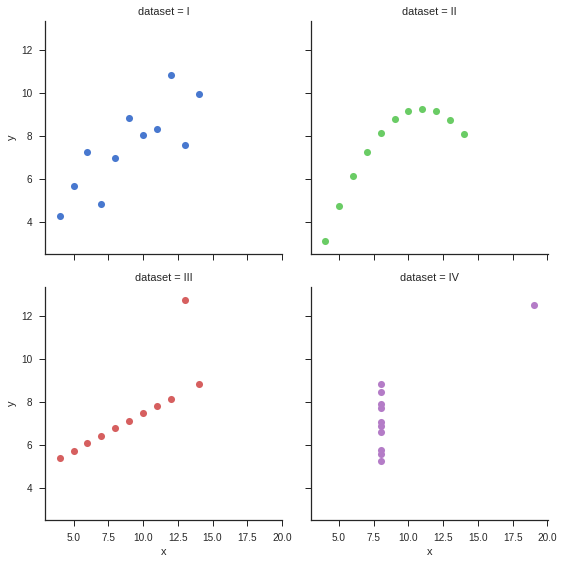

In [10]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1}, fit_reg=False)

## Linear regression

Show the results of a **linear regression** within each dataset

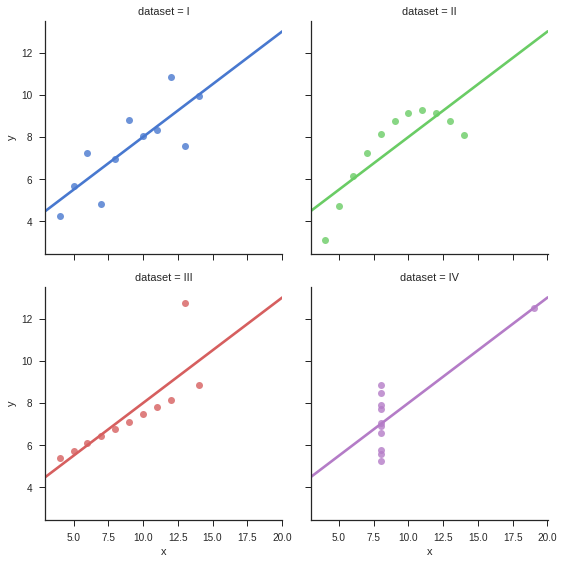

In [11]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4)

It's the same line for all datasets

Let's plot with its 95% confidence interval region.

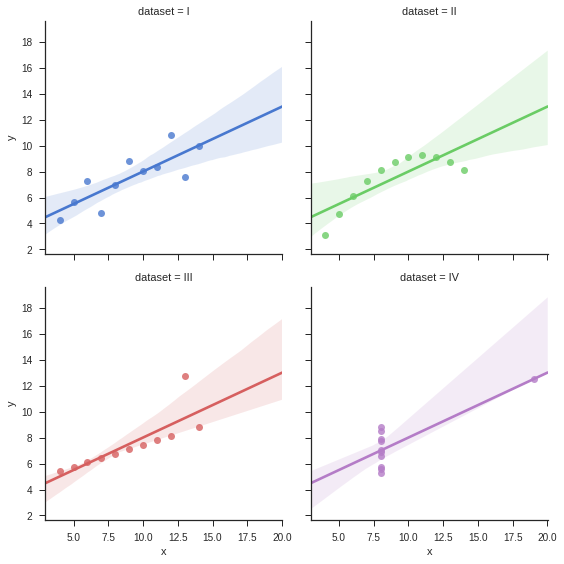

In [12]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=95, palette="muted", size=4)

# Key message

Visualize your data beforehand

## Nonlinear regression? outliers?

One can fit a polynomial regression model to explore simple kinds of **nonlinear** trends in the dataset

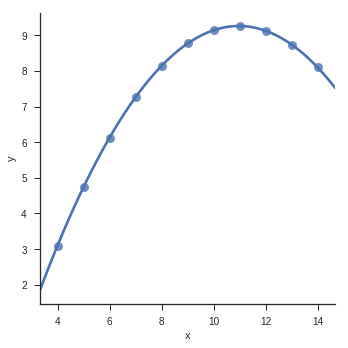

In [13]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'II'],
           order=2, ci=95, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

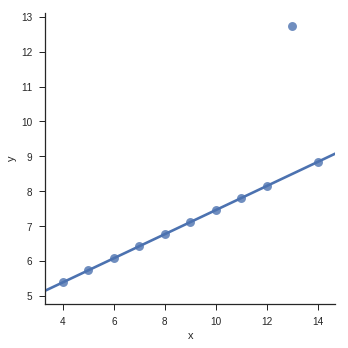

In [14]:
sns.lmplot(x="x", y="y", data=df[df.dataset == 'III'],
           robust=True, ci=None, scatter_kws={"s": 80});